# **Decision Tree and Random Forest**

**Name - Mitul Srivastava**

**ID - C00313606**


## LOG : Introduction to dataset and importing the data
### **Dataset** :  Red Wine dataset
### **Link** : https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009
### **Details** : The datset contains total 11 features regarding wine and a target variable named Quality having scores from 1-10.
### **AIM** : To use and fine tune Decision Tree and Random Forest algorithm to predict wine quality.

In [1]:
import pandas as pd
data = pd.read_csv("C:/Users/Mitul/Desktop/Study/Algorithms/DT&RF/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### **LOG** : Splitting data into X (Independent Features) and y (Target variable)

In [3]:
X = data.drop(columns=["quality"])
y = data["quality"]

### **LOG** : Splitting the data in training and test using train_test_split from sklearn.model_selection
### **Explaination** : In train_test_split we are taking the test_size as 0.2 that means 20% of data will be used for testing and keeping random_state = 42 for code reproducibility.

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### **LOG** : Training the Decision Tree model using depth of tree equal to 5 .

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

### **LOG** : Evaluation report analysis
### Precision - How many predicted values matched the actual value.
### Recall - How many in total were coreectly identified.
### F1 score - Harmonic mean of Precision and Recall.

### **Results :**
### The accuracy of Decision Tree is 58 percent.

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.584375
Decision Tree Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.62      0.71      0.66       136
           6       0.55      0.57      0.56       128
           7       0.56      0.45      0.50        40
           8       0.00      0.00      0.00         3

    accuracy                           0.58       320
   macro avg       0.29      0.29      0.29       320
weighted avg       0.56      0.58      0.57       320



C:\Users\Mitul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mitul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mitul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### **LOG** : Training the Random Forest model on same dataset number of decision trees in model 100 and depth 5 .

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

### **LOG** : The Random forest result is 2 percent better accuracy than decision tree.

In [10]:
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.596875
Random Forest Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.66      0.73      0.69       136
           6       0.53      0.66      0.59       128
           7       0.67      0.20      0.31        40
           8       0.00      0.00      0.00         3

    accuracy                           0.60       320
   macro avg       0.31      0.26      0.26       320
weighted avg       0.58      0.60      0.57       320



C:\Users\Mitul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mitul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mitul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### **LOG** : Using GridSearchCV to tune the decision tree hyperparameters.

In [25]:
from sklearn.model_selection import GridSearchCV
dt_params = {
    "max_depth": [5,6,7,8,9,10, 15, None],
    "criterion": ["gini", "entropy"],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring="accuracy")
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_

In [26]:
print("Best Decision Tree Params:", dt_grid.best_params_)

Best Decision Tree Params: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}


### **LOG** : Even after tuning the hyperparameters the accuracy remains the same for decision tree.

In [27]:
y_pred_dt2 = best_dt.predict(X_test)
print("Optimized Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Optimized Decision Tree Accuracy: 0.584375


### **LOG** : Plotting feature importance score for all the features.

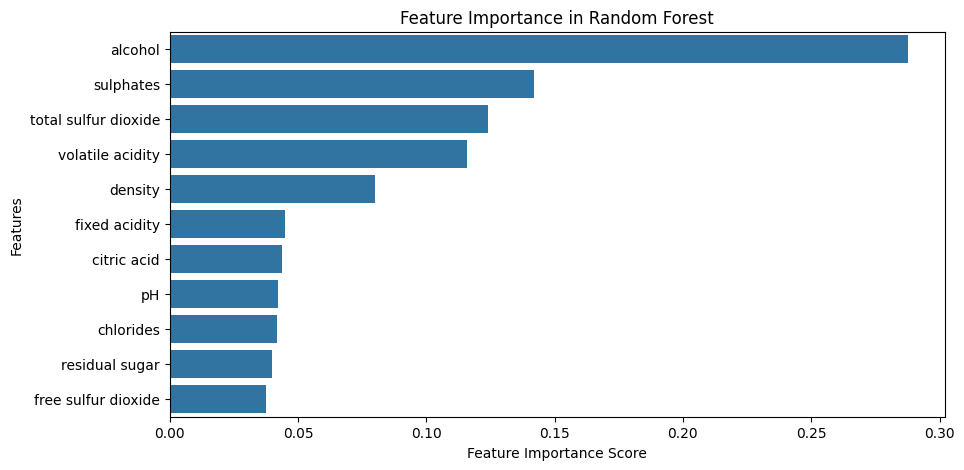

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()

### **LOG** : Training the decision tree after removing the features with low importance like free sulphur dioxide, residual sugar, chlorides and pH.

### **UPDATED DT RESULT** : We see that after removing the less important features the accuracy of Decision Tree increases to almost 60 percent.

In [33]:
from sklearn.model_selection import cross_val_score
selected_features = ['alcohol', 'sulphates', 'total sulfur dioxide', 'volatile acidity', 'density', 'fixed acidity', 'citric acid']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model_selected = DecisionTreeClassifier(random_state=42)
scores_selected = cross_val_score(model_selected, X_train_selected, y_train, cv=5, scoring='accuracy')

print(f'Accuracy with selected features: {scores_selected.mean():.4f}')


Accuracy with selected features: 0.5965


### **LOG** : Similar to decision tree training the Random Forest on selected features.

### **UPDATED RF RESULT** : After training random forest on selected features we see a 7 percent increase in accuracy to 67 percent for Random forest model.

In [34]:
model_selected2 = RandomForestClassifier(random_state=42)
scores_selected2 = cross_val_score(model_selected2, X_train_selected, y_train, cv=5, scoring='accuracy')

print(f'Accuracy with selected features: {scores_selected2.mean():.4f}')

Accuracy with selected features: 0.6755


### **REFERENCES** :
### https://chatgpt.com/
### https://www.kaggle.com/
### https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.08-Random-Forests.ipynb

## **END**